In [1]:
## Bike Sharing Assignment

In [2]:
# import dependend libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
### 1. Data Reading & Understanding

In [4]:
# Loading the data and converting into dataframe
#df=pd.read_csv("day.csv")
df=pd.read_csv(r"C:\Users\balod\Desktop\IIIT-B\Bike sharing\day.csv")

In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
df.shape

(730, 16)

In [7]:
# check if there is any headers/footers or summary details rows and delete them.

In [8]:
df.head() # summary
print(df.shape)
df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df.tail() # check if total, subtotal rows are present

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [10]:
# From above analysis we can see that there is no header/footer/summary/subtotal rows
# Also number of rows is 730 and columns is 16

In [11]:
# check if there is any null value

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# there are no null values present in data

In [15]:
# data looks within the permissible range
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [16]:
# Delete unnecessary columns:

In [17]:
# 1. From above analysis we can see that the columns instant is unique in nature and act like a id which will not participate
# in analysis. Hence we can drop it.
# 2. we can also see that only dteday is of object type date while others attribute is of int/float type.
# Since we already have month and year so we can drop dteday column.

In [18]:
print("Total columns with values NA: ", len(df.columns[df.isna().all()].tolist()))

Total columns with values NA:  0


In [19]:
# Delete all the columns having unique values

unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
unique_columns

['instant', 'dteday']

In [20]:
dropped_columns=['instant','dteday']
df.drop(dropped_columns,axis=1,inplace=True)
df.shape

(730, 14)

In [21]:
# Check if there are any duplicate rows

In [22]:
duplicate_rows = len(df[df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


In [23]:
# No duplicate rows found

In [24]:
# there are no more columns with unique values

In [25]:
# Inferences:
# We can see that values are within the ranges. So need to remove any outliers

In [26]:
# Transforming the Data

In [27]:
# From data dictionary and above analysis we can say that  season, weathersit & month are categorical values but found as int.
# Lets Convert season, weathersit & month to Catogory type
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7)
memory usage: 65.7 KB


In [28]:
# As per data dictionary, following categorical variables have values:
# 1. yr has two values 0 for 2018 and 1 for 2019.
# 2. holiday 0 or 1.
# 3. working day 0 or 1.
# 4. weathersit has three values good, bad and moderate weatherSit. 
# 5. season (1:spring, 2:summer, 3:fall, 4:winter)
# all the data seems to be in range

In [29]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [30]:
### 2. EDA

In [31]:
#### Univariate analysis

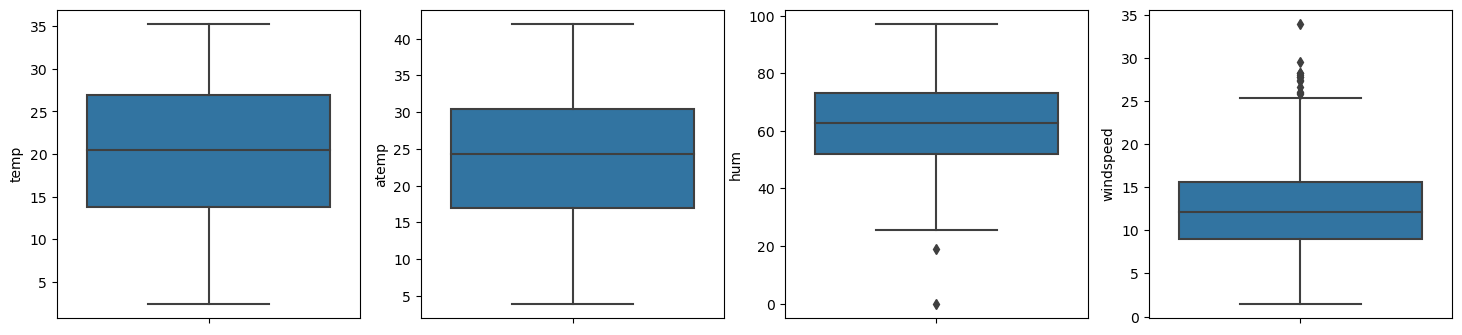

In [32]:
# check if any outliers are present in numeric features.
# raw box plots for independent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

k = 1
for col in cols:
    plt.subplot(1,4,k)
    sns.boxplot(y=col, data=df)
    k+=1

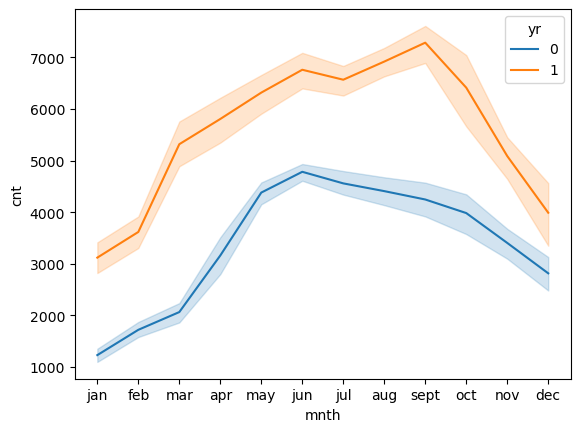

In [33]:
# Line graph: show the count vs month for year 2018 and 2019.
sns.lineplot(x = "mnth", y = "cnt", data=df,hue = "yr")
plt.show() 

In [34]:
# Inferences:
# 1. From Line Graph we can see that target Variable cnt has increased from 2018 to 2019.
# 2. Demand for bike is high between may to oct for year 2018 and 2019.
# 3. From Boxchart we can also see that there is no outliers present.

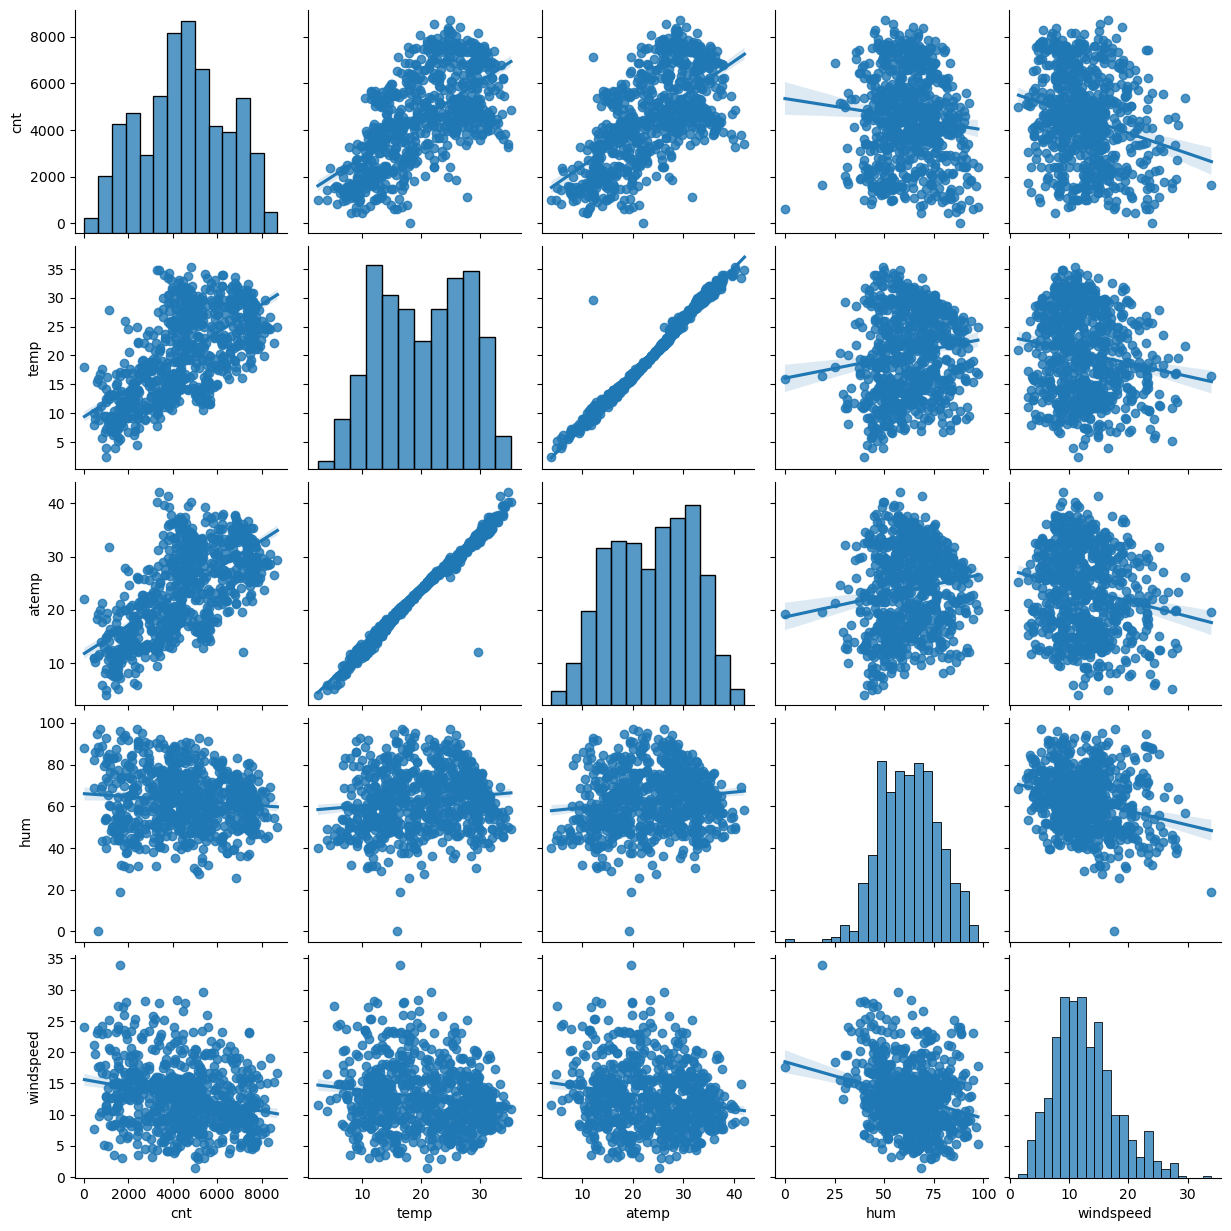

In [35]:
# Lets plot pairplots to have better to see if cnt is linearly  depend upon is independet variables. 
numerical_variabels=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=df,vars=numerical_variabels, kind="reg")
plt.show()

In [36]:
# Inferences:
# 1. there is linear dependecy between temp, atemp and count.
# 2. temp and atemp are highly correlated.

In [37]:
####  Bivariate analysis

In [38]:
#  Barcharts for categorical variables to see demands

In [39]:
# function to create barplot related to categorical columns

def plot_bar_graphs(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'Bar Plot of {column} vs cnt')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='yr', palette='Set1')
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

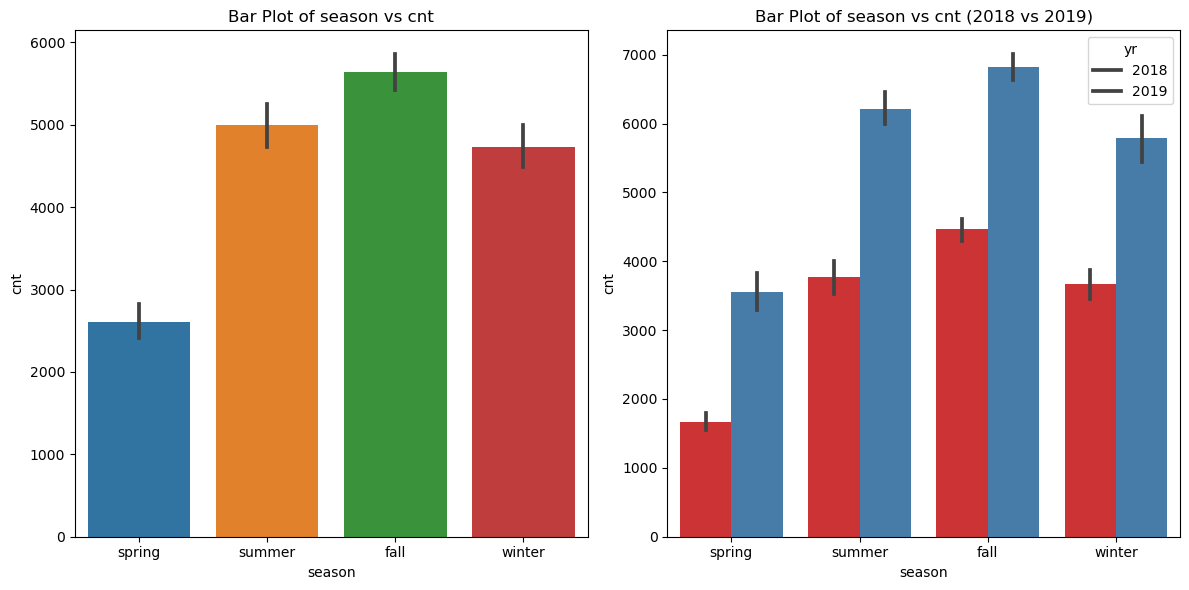

In [40]:
plot_bar_graphs('season')

In [41]:
# Inferences:
# 1. Fall season is having high number of bike rental.
# 2. Bike rental in 2019 has increaded for every season compared to 2018.

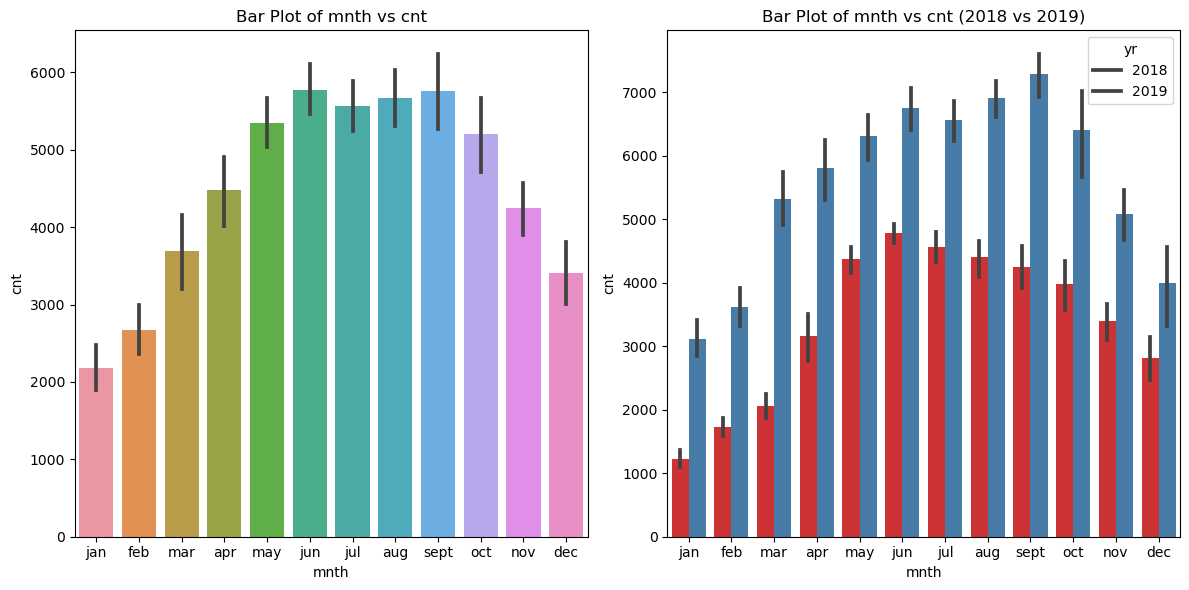

In [42]:
plot_bar_graphs('mnth')

In [43]:
# Inferences:
# 1. May to oct have highest number of bike registration.
# 2. Bike registration in 2019 has increased for every month compared to 2018.

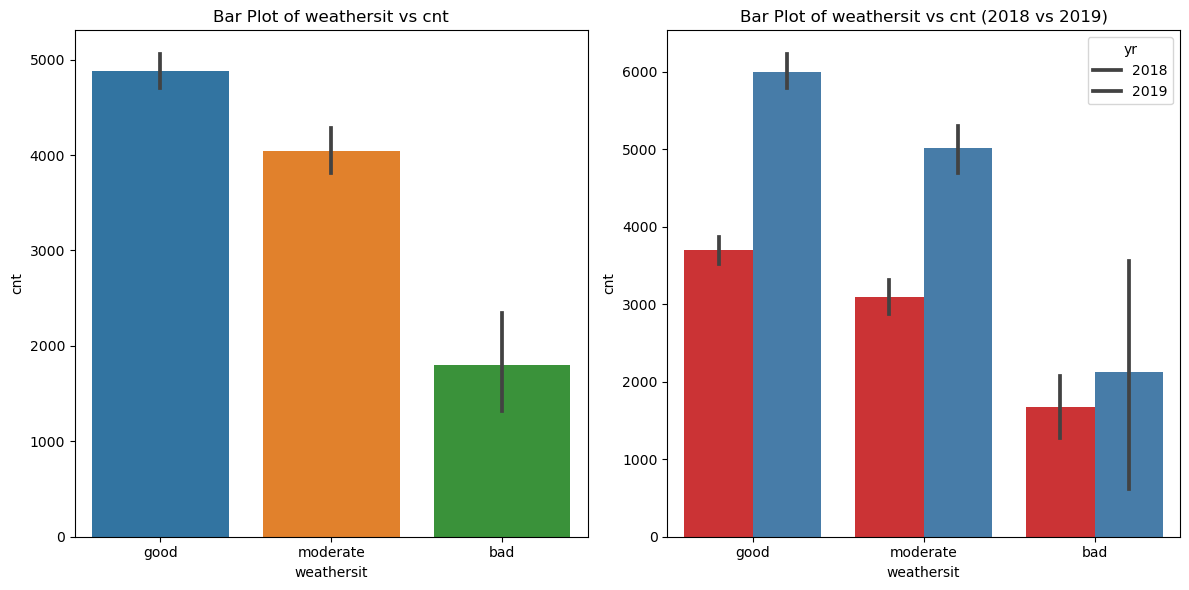

In [44]:
plot_bar_graphs('weathersit')

In [45]:
# Inferences:
# 1. People prefer bike rental when weather situation is good. 
# 2. Bike registration in 2019 has increaded for every weather situtation as compared to 2018.

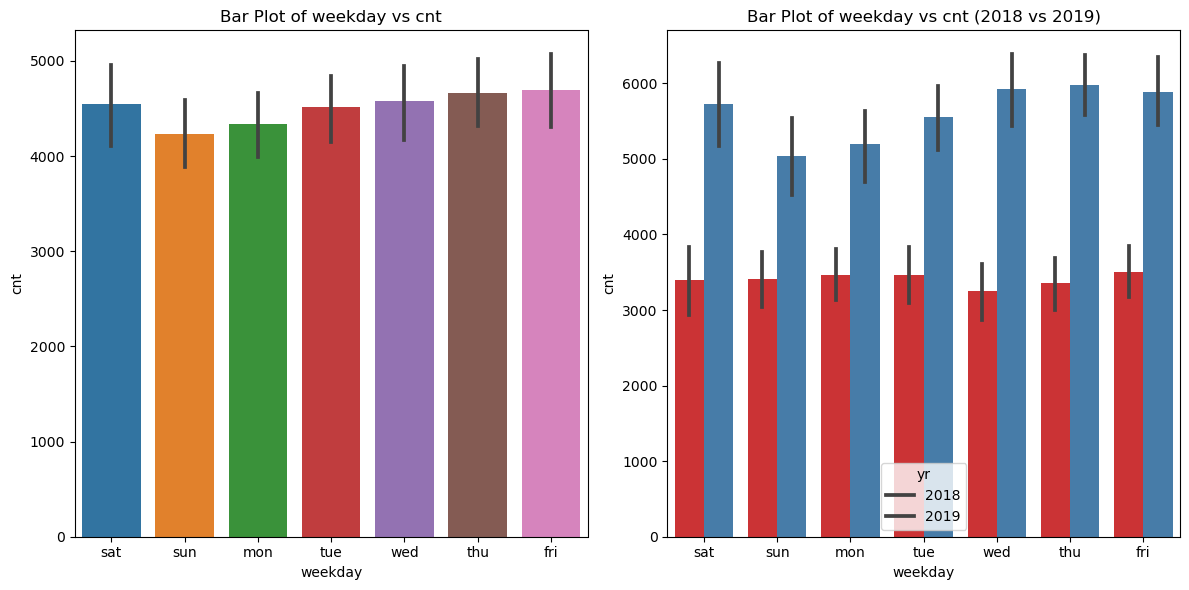

In [46]:
plot_bar_graphs('weekday')

In [47]:
# Inferences:
# 1. People don't prefer bike rental on weekends. 

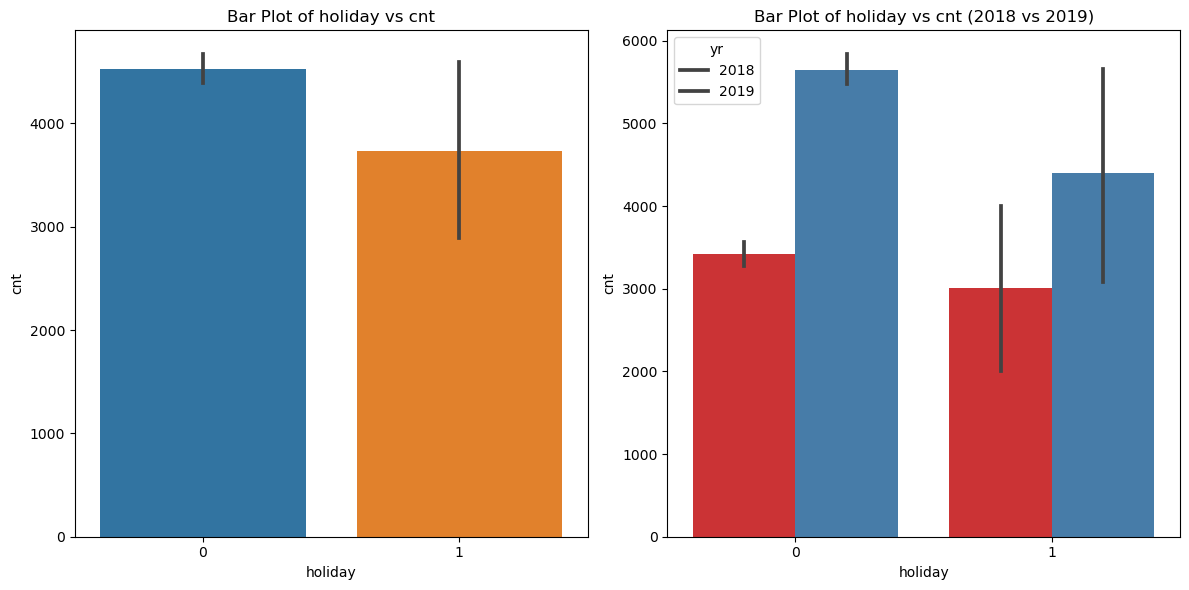

In [48]:
plot_bar_graphs('holiday')

In [49]:
# Inferences:
# 1. People preference for renting bike on holiday decreased from 2018 to 2019.

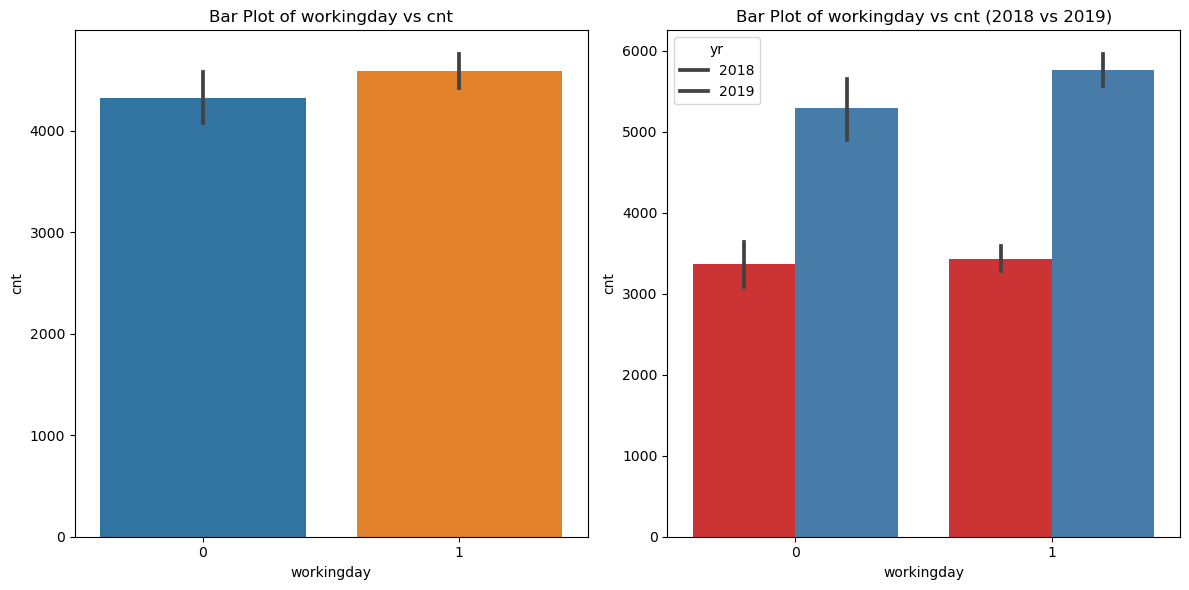

In [50]:
plot_bar_graphs('workingday')

In [51]:
# Inferences:
# 1. People prefer bike rental on working days.

In [52]:
# Lets draw heatMap to indentify is there any correlation.

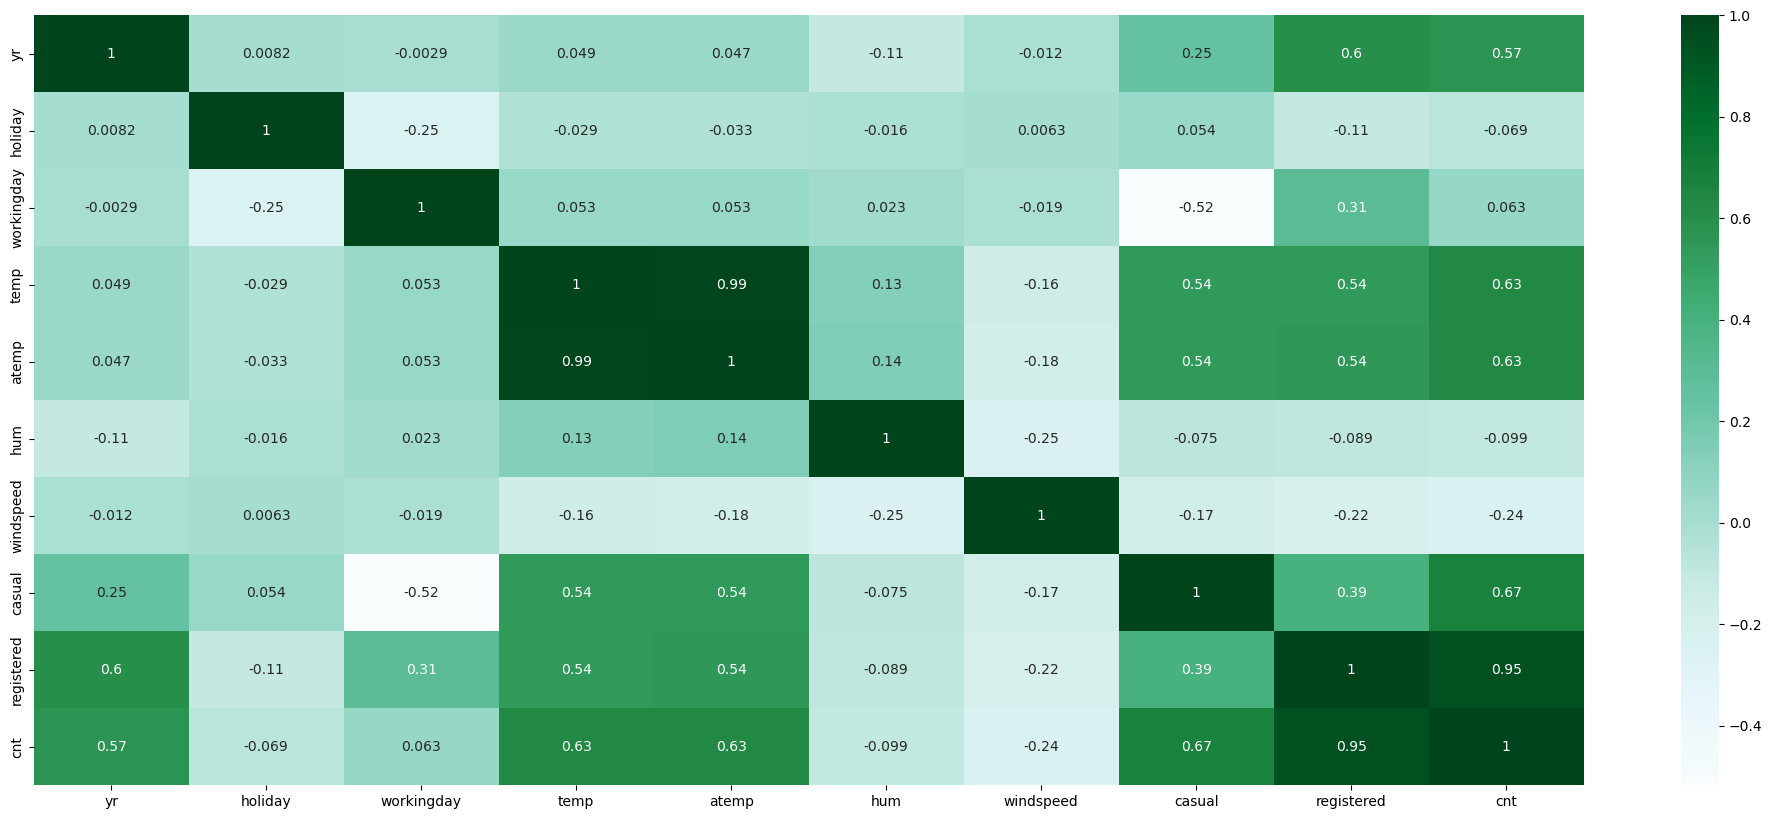

In [53]:
# Lets plot the correlation matrix(heatmap)
plt.figure(figsize=(25,10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='BuGn', annot = True)
plt.show()

In [54]:
#Inferences from heatmap: 
#1. Since Count is sum of casual and registered. That we can infer from  heatmap as casual and registered are highly correleted with cnt. 
#2. holiday, hum, and windspeed is negatively correlated. 
#3. Indepedent variable temp and atemp is highly correlated(0.99).This show that there is high possiblity that one may have derived from another,One of them can be dropped. Will use VIP and p values to drop this.

In [55]:
df.shape

(730, 14)

In [56]:
# Dropping casual and Registed as they summed to Cnt.

df.drop(['casual','registered'],axis=1,inplace=True)

In [57]:
df.shape

(730, 12)

In [58]:
## 3. Data Preparation

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


In [60]:
#### Creating dummy variables for categorical variables.

In [61]:
# we need to create dummy variables for four categorical variables. 'mnth', 'weekday', 'season' & 'weathersit'

In [62]:
df = pd.get_dummies(df, drop_first=True)

In [63]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


In [64]:
# Divide the train and test data
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.75, test_size=0.25, random_state=100)

In [65]:
df_train.shape

(547, 30)

In [66]:
df_test.shape

(183, 30)

In [67]:
#### Scaling numeric variables 

In [68]:
#scaling numeric variables of traning data using MinMaxScalor between 0-1.
num_vars = df_train.columns
scaler=MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [69]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
311,0.0,0.0,1.0,0.435124,0.437339,0.743667,0.057471,0.481247,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
523,1.0,0.0,1.0,0.735215,0.680985,0.482181,0.286093,0.887483,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,1.0,0.0,1.0,0.391151,0.374375,0.737917,0.659615,0.335136,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
413,1.0,0.0,0.0,0.358285,0.362754,0.550880,0.319514,0.494248,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
253,0.0,0.0,0.0,0.740406,0.695906,0.735509,0.156398,0.578003,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,0.511382,0.244973,0.252285,...,0.082267,0.087751,0.153565,0.151737,0.151737,0.131627,0.135283,0.151737,0.349177,0.027422
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,0.225008,0.430465,0.434722,...,0.275022,0.283192,0.360861,0.359094,0.359094,0.338394,0.342339,0.359094,0.477146,0.163460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# From above analysis we can see that numeric variabels has scaled between 0 and 1.

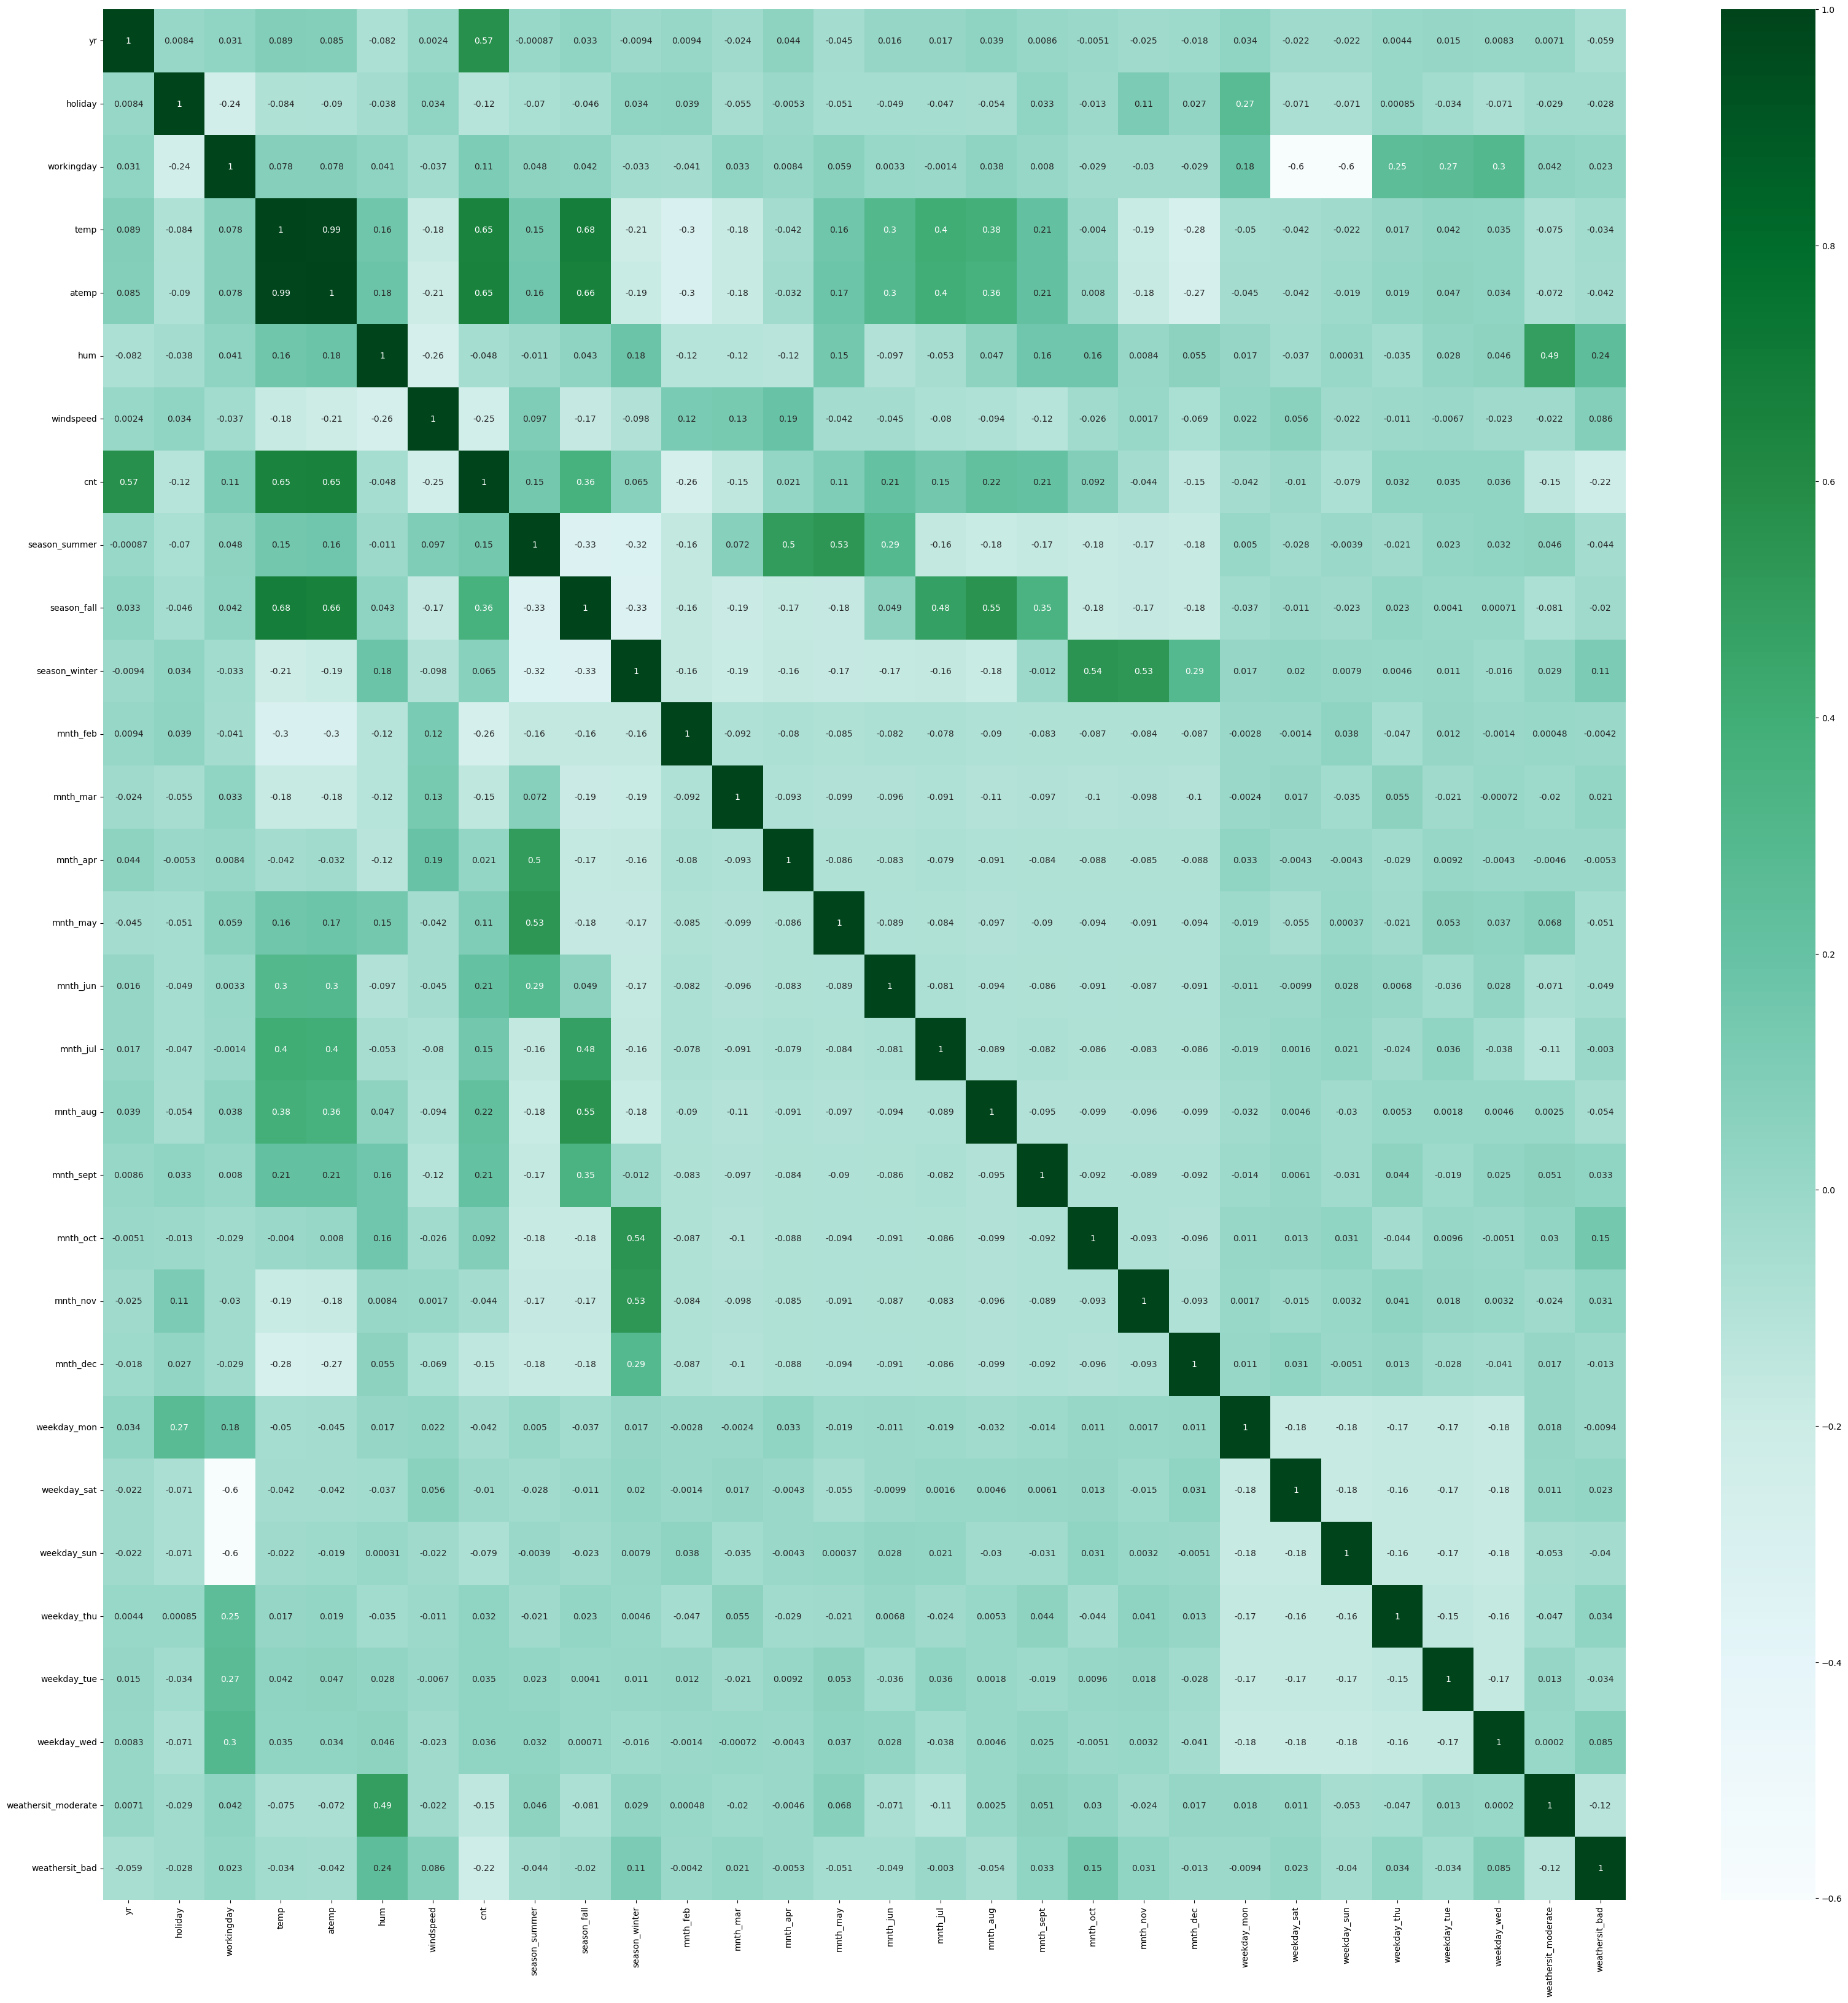

In [72]:
# Plotting a correlation matrix
plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="BuGn")
plt.show()

In [73]:
# popping: seperating independent and dependent variables
y_train=df_train.pop('cnt')
X_train=df_train

In [74]:
## 4. Build a Model

In [75]:
####  Model #1 

In [76]:
# Building a model with all features using statsmodels :
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm.select_dtypes(include='number')).fit()

lr1.params

const                  0.150386
yr                     0.230799
holiday               -0.022558
workingday             0.078823
temp                   0.391615
atemp                  0.054732
hum                   -0.146786
windspeed             -0.177329
season_summer          0.095992
season_fall            0.051909
season_winter          0.166105
mnth_feb               0.027713
mnth_mar               0.060681
mnth_apr               0.055422
mnth_may               0.076799
mnth_jun               0.068907
mnth_jul               0.024709
mnth_aug               0.079394
mnth_sept              0.141909
mnth_oct               0.065041
mnth_nov               0.011734
mnth_dec               0.005368
weekday_mon           -0.023312
weekday_sat            0.074136
weekday_sun            0.019984
weekday_thu           -0.010611
weekday_tue           -0.021888
weekday_wed           -0.008645
weathersit_moderate   -0.059812
weathersit_bad        -0.259461
dtype: float64

In [77]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          4.86e-198
Time:                        00:16:23   Log-Likelihood:                 570.73
No. Observations:                 547   AIC:                            -1083.
Df Residuals:                     518   BIC:                            -958.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1504      0.022      6.709      0.000       0.106       0.194
yr                      0.2308      0.008     30.023      0.000       0.216       0.246
holiday                -0.0226      0.021     -1.067      0.287      -0.064       0.019
workingday              0.0788      0.010      7.746      0.000       0.059       0.099
temp                    0.3916      0.138      2.838      0.005       0.121       0.663
atemp                   0.0547      0.136      0.404      0.686      -0.211       0.321
hum                    -0.1468      0.037     -3.934      0.000      -0.220      -0.073
windspeed              -0.1773      0.025     -7.069      0.000      -0.227      -0.128
season_summer           0.0960      0.023      4.210      0.000       0.051       0.141
season_fall             0.0519      0.028      1.828      0.068      -0.004       0.108
season_winter           0.1661      0.024      7.001      0.000       0.119       0.213
mnth_feb                0.0277      0.019      1.449      0.148      -0.010       0.065
mnth_mar                0.0607      0.021      2.880      0.004       0.019       0.102
mnth_apr                0.0554      0.032      1.720      0.086      -0.008       0.119
mnth_may                0.0768      0.035      2.222      0.027       0.009       0.145
mnth_jun                0.0689      0.037      1.878      0.061      -0.003       0.141
mnth_jul                0.0247      0.042      0.595      0.552      -0.057       0.106
mnth_aug                0.0794      0.039      2.010      0.045       0.002       0.157
mnth_sept               0.1419      0.035      4.045      0.000       0.073       0.211
mnth_oct                0.0650      0.032      2.052      0.041       0.003       0.127
mnth_nov                0.0117      0.030      0.387      0.699      -0.048       0.071
mnth_dec                0.0054      0.024      0.227      0.821      -0.041       0.052
weekday_mon            -0.0233      0.015     -1.582      0.114      -0.052       0.006
weekday_sat             0.0741      0.012      6.386      0.000       0.051       0.097
weekday_sun             0.0200      0.012      1.688      0.092      -0.003       0.043
weekday_thu            -0.0106      0.015     -0.707      0.480      -0.040       0.019
weekday_tue            -0.0219      0.015     -1.474      0.141      -0.051       0.007
weekday_wed            -0.0086      0.015     -0.596      0.551      -0.037       0.020
weathersit_moderate    -0.0598      0.010     -6.002      0.000      -0.079      -0.040
weathersit_bad         -0.2595      0.026     -9.971      0.000      -0.311      -0.208
==============================================================================
Omnibus:                       92.397   Durbin-Watson:                   2.062
Prob(Omnibus):       

In [78]:
# Here, we can see that adjusted R-Square is 0.848, which is pretty good. Let us see if we can reduce the independet features

In [79]:
# Since number of predictor variables is around 30. It will not be feasible to manually eliminate the insignificance variable.
# Will use hybrid (REF + manual) to eliminate insignificance variable.

In [80]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [82]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 2),
 ('mnth_apr', False, 5),
 ('mnth_may', False, 3),
 ('mnth_jun', False, 4),
 ('mnth_jul', False, 9),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 14),
 ('mnth_dec', False, 15),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [83]:
# RFE support Variables
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat', 'weathersit_moderate',
       'weathersit_bad'],
      dtype='object')

In [84]:
# RFE not Supported Variables
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [85]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]


In [86]:
# Model#2 

In [87]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [88]:
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,23.47
4,hum,16.96
7,season_fall,7.77
2,workingday,4.89
5,windspeed,3.89
6,season_summer,3.44
8,season_winter,2.85
13,weathersit_moderate,2.15
0,yr,2.04
9,mnth_aug,1.87


In [89]:
# Model 2 
#Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          7.90e-209
Time:                        00:16:24   Log-Likelihood:                 562.51
No. Observations:                 547   AIC:                            -1093.
Df Residuals:                     531   BIC:                            -1024.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1905      0.027      6.995      0.000       0.137       0.244
yr                      0.2282      0.008     29.882      0.000       0.213       0.243
holiday                -0.0711      0.025     -2.864      0.004      -0.120      -0.022
workingday              0.0458      0.011      4.261      0.000       0.025       0.067
temp                    0.4978      0.032     15.651      0.000       0.435       0.560
hum                    -0.1644      0.036     -4.578      0.000      -0.235      -0.094
windspeed              -0.1786      0.024     -7.394      0.000      -0.226      -0.131
season_summer           0.1226      0.014      8.699      0.000       0.095       0.150
season_fall             0.0336      0.021      1.611      0.108      -0.007       0.075
season_winter           0.1484      0.013     11.562      0.000       0.123       0.174
mnth_aug                0.0470      0.017      2.789      0.005       0.014       0.080
mnth_sept               0.1167      0.016      7.098      0.000       0.084       0.149
mnth_oct                0.0472      0.017      2.858      0.004       0.015       0.080
weekday_sat             0.0532      0.014      3.879      0.000       0.026       0.080
weathersit_moderate    -0.0580      0.010     -5.849      0.000      -0.077      -0.038
weathersit_bad         -0.2538      0.026     -9.869      0.000      -0.304      -0.203
==============================================================================
Omnibus:                       83.546   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.343
Skew:                          -0.756   Prob(JB):                     4.30e-50
Kurtosis:                       5.773   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# From abvoe analysis all the variables is having low p-values and also adjusted-R-square value is 0.848 which is the same
# after droping 14 features, this means most of the features were insignifianct and few were negatively correlated
# from above VIP table we can see that temp is having 23.47 vif value, which is quite high. 
# lets remove this feature.

In [91]:
X_train_rfe2 = X_train_rfe.drop(["temp"], axis = 1)
X_train_rfe2.head()

,yr,holiday,workingday,hum,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sat,weathersit_moderate,weathersit_bad
311,0.0,0.0,1.0,0.743667,0.057471,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
523,1.0,0.0,1.0,0.482181,0.286093,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,1.0,0.0,1.0,0.737917,0.659615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
413,1.0,0.0,0.0,0.550880,0.319514,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.735509,0.156398,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [92]:
calculateVIF(X_train_rfe2)

,Features,VIF
3,hum,11.73
2,workingday,4.85
4,windspeed,3.84
6,season_fall,3.36
7,season_winter,2.67
12,weathersit_moderate,2.00
5,season_summer,1.99
0,yr,1.98
8,mnth_aug,1.87
11,weekday_sat,1.86


In [93]:
# Model 3 
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     137.5
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          2.12e-166
Time:                        00:16:24   Log-Likelihood:                 458.76
No. Observations:                 547   AIC:                            -887.5
Df Residuals:                     532   BIC:                            -822.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2654      0.032      8.197      0.000       0.202       0.329
yr                      0.2439      0.009     26.673      0.000       0.226       0.262
holiday                -0.0721      0.030     -2.406      0.016      -0.131      -0.013
workingday              0.0510      0.013      3.931      0.000       0.026       0.076
hum                    -0.0413      0.042     -0.976      0.329      -0.124       0.042
windspeed              -0.1811      0.029     -6.205      0.000      -0.238      -0.124
season_summer           0.2654      0.013     20.450      0.000       0.240       0.291
season_fall             0.2774      0.017     16.566      0.000       0.245       0.310
season_winter           0.1972      0.015     13.116      0.000       0.168       0.227
mnth_aug                0.0446      0.020      2.189      0.029       0.005       0.085
mnth_sept               0.1043      0.020      5.255      0.000       0.065       0.143
mnth_oct                0.1060      0.019      5.453      0.000       0.068       0.144
weekday_sat             0.0539      0.017      3.251      0.001       0.021       0.086
weathersit_moderate    -0.0865      0.012     -7.354      0.000      -0.110      -0.063
weathersit_bad         -0.3098      0.031    -10.072      0.000      -0.370      -0.249
==============================================================================
Omnibus:                       51.725   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.849
Skew:                          -0.475   Prob(JB):                     5.22e-30
Kurtosis:                       5.239   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# From above we can see that hum is having high pValue 0.329>0.05 and hum VIF is 11.73>5.
# Lets drop hum

In [95]:
X_train_rfe3 = X_train_rfe2.drop(["hum"], axis = 1)
X_train_rfe3.head()

,yr,holiday,workingday,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sat,weathersit_moderate,weathersit_bad
311,0.0,0.0,1.0,0.057471,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
523,1.0,0.0,1.0,0.286093,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,1.0,0.0,1.0,0.659615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
413,1.0,0.0,0.0,0.319514,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.156398,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [96]:
calculateVIF(X_train_rfe3)

,Features,VIF
2,workingday,3.80
3,windspeed,3.41
5,season_fall,2.95
6,season_winter,2.26
0,yr,1.94
7,mnth_aug,1.87
4,season_summer,1.72
10,weekday_sat,1.66
9,mnth_oct,1.60
11,weathersit_moderate,1.56


In [97]:
# Model 4
#Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          2.73e-167
Time:                        00:16:24   Log-Likelihood:                 458.27
No. Observations:                 547   AIC:                            -888.5
Df Residuals:                     533   BIC:                            -828.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2390      0.018     13.406      0.000       0.204       0.274
yr                      0.2447      0.009     26.890      0.000       0.227       0.263
holiday                -0.0716      0.030     -2.390      0.017      -0.131      -0.013
workingday              0.0515      0.013      3.974      0.000       0.026       0.077
windspeed              -0.1727      0.028     -6.190      0.000      -0.228      -0.118
season_summer           0.2638      0.013     20.488      0.000       0.239       0.289
season_fall             0.2763      0.017     16.539      0.000       0.244       0.309
season_winter           0.1952      0.015     13.105      0.000       0.166       0.224
mnth_aug                0.0433      0.020      2.130      0.034       0.003       0.083
mnth_sept               0.1020      0.020      5.178      0.000       0.063       0.141
mnth_oct                0.1046      0.019      5.396      0.000       0.067       0.143
weekday_sat             0.0549      0.017      3.323      0.001       0.022       0.087
weathersit_moderate    -0.0929      0.010     -9.541      0.000      -0.112      -0.074
weathersit_bad         -0.3208      0.029    -11.203      0.000      -0.377      -0.265
==============================================================================
Omnibus:                       52.024   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.567
Skew:                          -0.479   Prob(JB):                     3.65e-30
Kurtosis:                       5.243   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# we can see that Adj. R-square is 0.778 and pvalue is less than 0.05 for every features.

In [99]:
# From the above Model Summary Report we can say that all the p-values of respective features are less than 0.05.
# Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such 
# variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10

In [100]:
### 5. Linear Regrssion Assumptions Proofs
#### Residual Analysis

In [101]:
# Lets perform Residual Analysis
y_train_pred = lr4.predict(X_train_lm4)
residual = y_train_pred - y_train

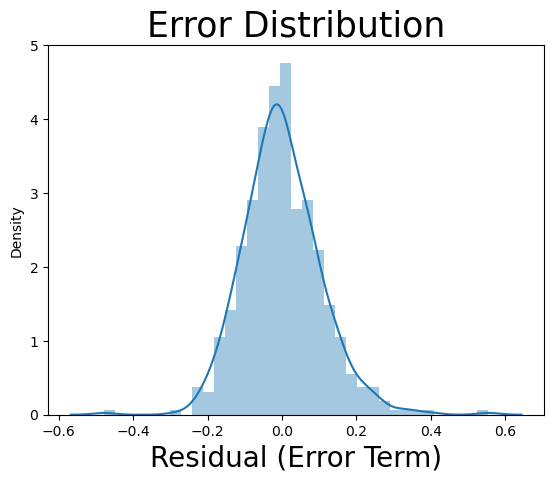

In [102]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

In [103]:
#Inferences: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.


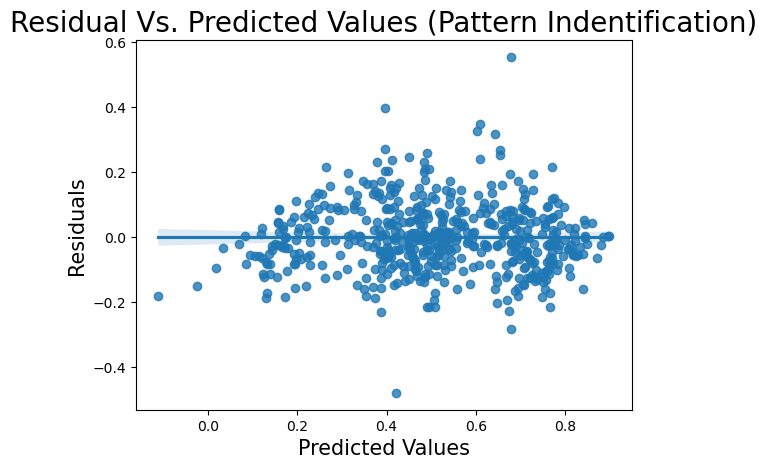

In [104]:
#2 Assumption of Error Terms Being Independent

sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [105]:
#From the above graph, we see that there is almost no relation between Residual & Predicted Value

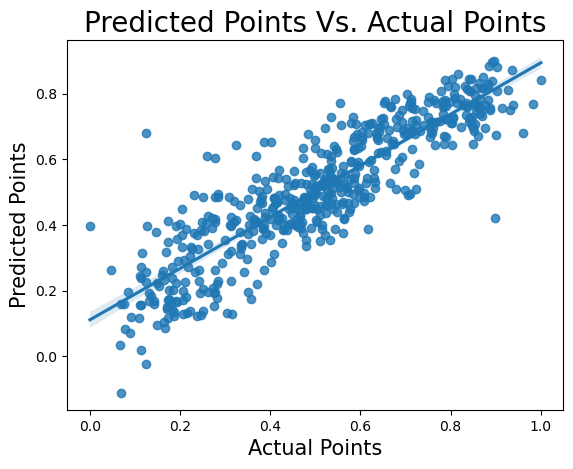

In [106]:
# 3. Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [107]:
# we can see that variance is similar from both end of fitted line.

In [108]:
# Multicorrelation
calculateVIF(X_train_rfe3)

,Features,VIF
2,workingday,3.80
3,windspeed,3.41
5,season_fall,2.95
6,season_winter,2.26
0,yr,1.94
7,mnth_aug,1.87
4,season_summer,1.72
10,weekday_sat,1.66
9,mnth_oct,1.60
11,weathersit_moderate,1.56


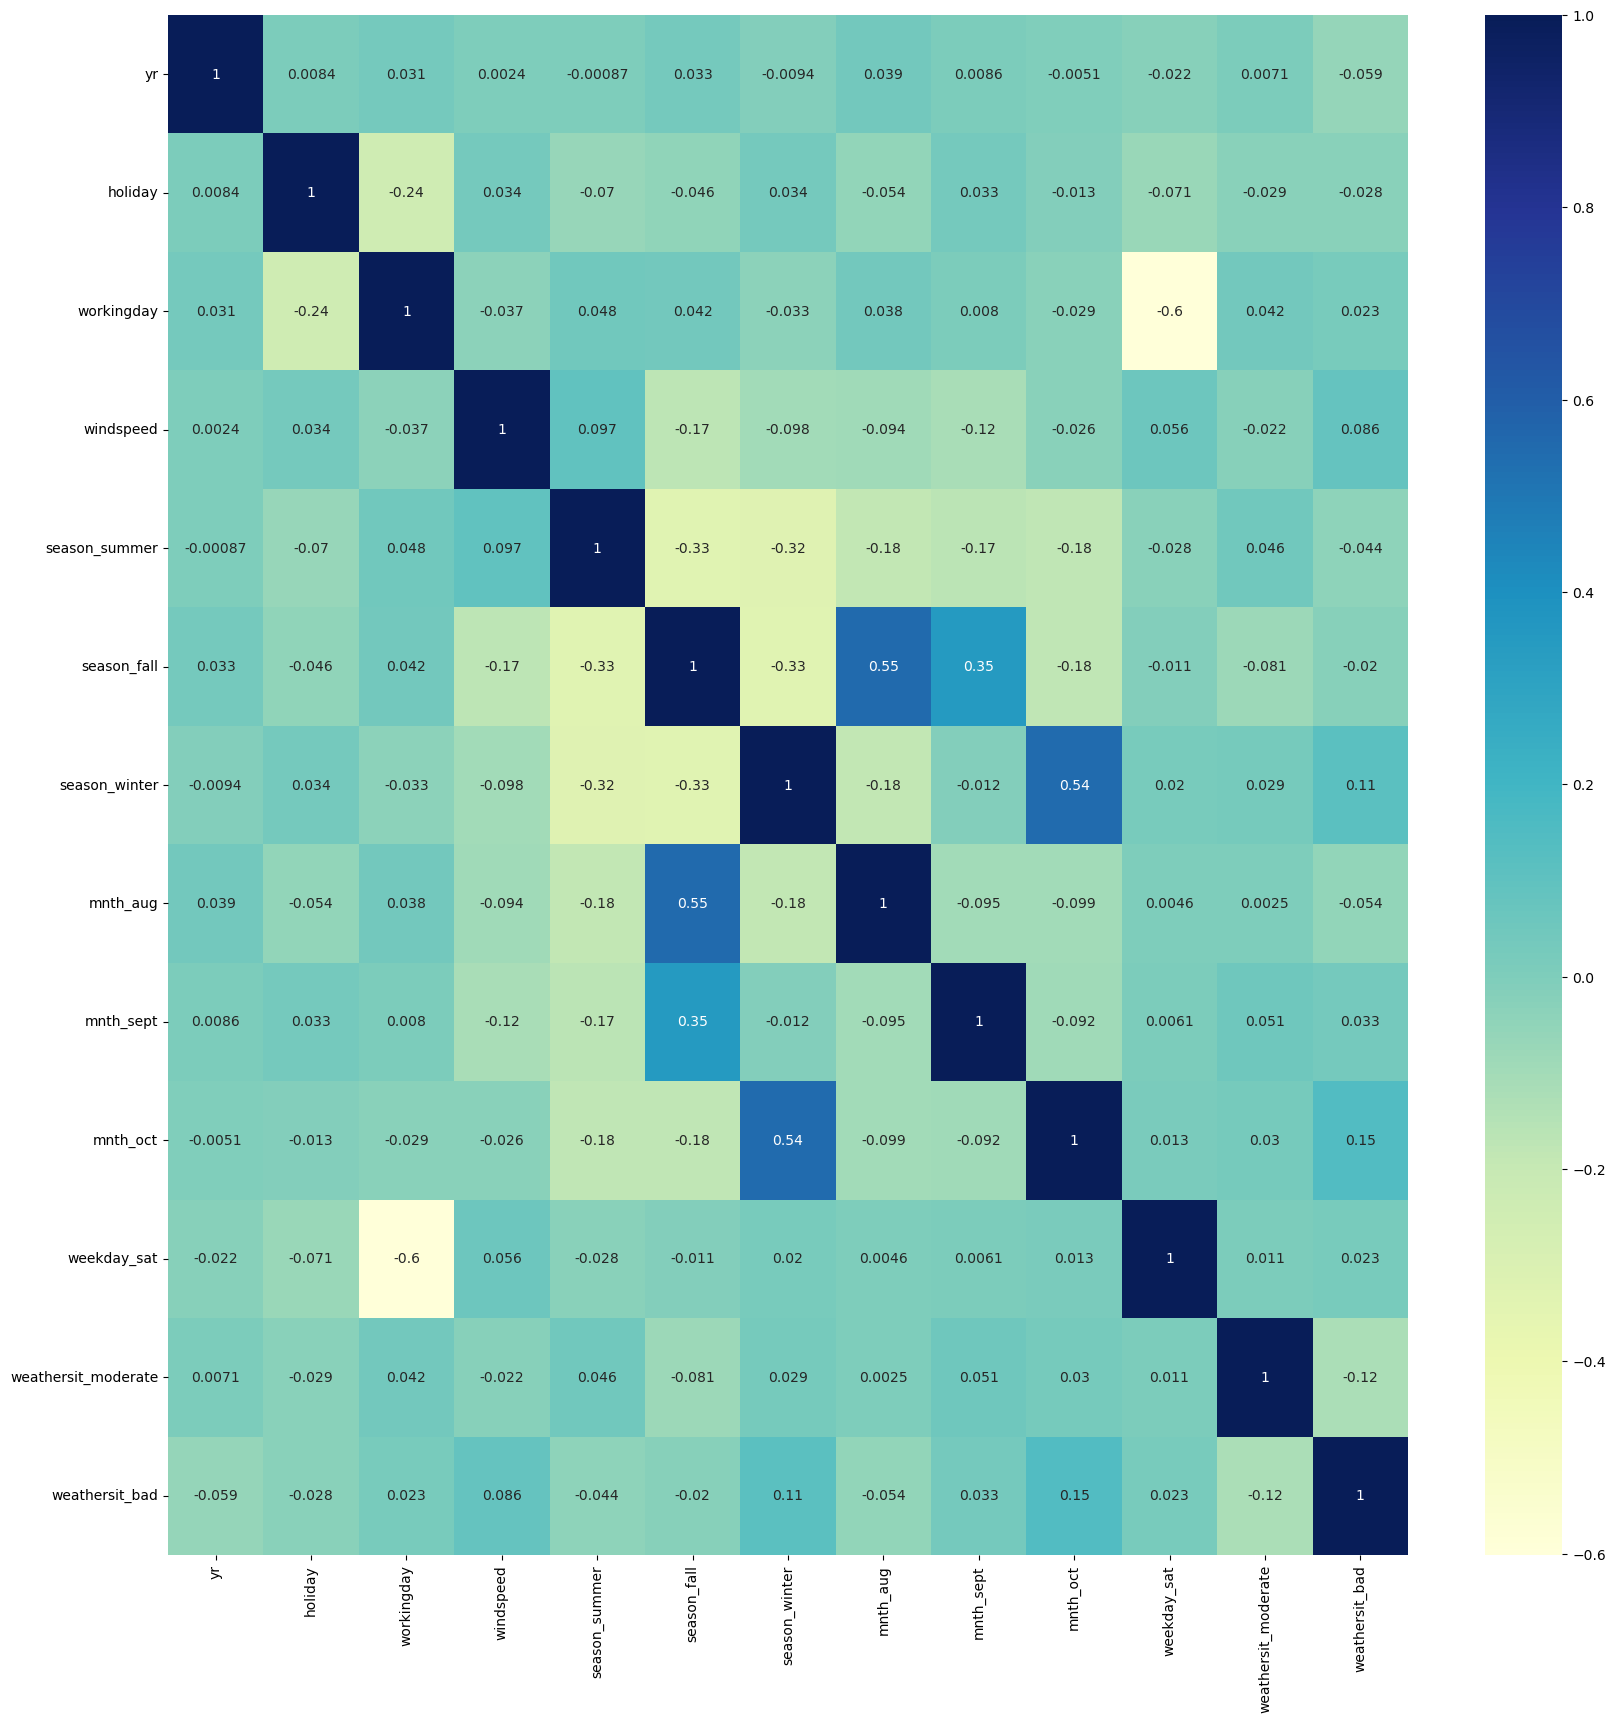

In [109]:
plt.figure(figsize = (20, 20))
# Heatmap
sns.heatmap(X_train_rfe3.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [110]:
# As per above analysis we didn't found multi-colinearity among independedt variables.

In [111]:
### 6. Model Prediction on Test Data

In [112]:
num_vars = df_test.columns
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [113]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.692706,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0.712034,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.0,0.0,1.0,0.511964,0.496145,0.837699,0.334206,0.303382,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.547400,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
152,0.0,0.0,1.0,0.817246,0.741471,0.314298,0.537414,0.569029,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [114]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.542076,0.635166,0.316439,0.530233,0.273224,0.273224,...,0.081967,0.076503,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290,0.300546,0.032787
std,0.500765,0.178567,0.446837,0.234887,0.219336,0.152926,0.159371,0.215783,0.446837,0.446837,...,0.275067,0.266530,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858,0.459754,0.178567
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.393293,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.533134,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.681086,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
# divie into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   183 non-null    float64
 1   holiday              183 non-null    float64
 2   workingday           183 non-null    float64
 3   temp                 183 non-null    float64
 4   atemp                183 non-null    float64
 5   hum                  183 non-null    float64
 6   windspeed            183 non-null    float64
 7   season_summer        183 non-null    float64
 8   season_fall          183 non-null    float64
 9   season_winter        183 non-null    float64
 10  mnth_feb             183 non-null    float64
 11  mnth_mar             183 non-null    float64
 12  mnth_apr             183 non-null    float64
 13  mnth_may             183 non-null    float64
 14  mnth_jun             183 non-null    float64
 15  mnth_jul             183 non-null    float6

In [116]:
X_test=X_test[X_train_rfe3.columns]
# Adding constant variable to test dataframe
X_test_lr4 = sm.add_constant(X_test)
X_test_lr4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                183 non-null    float64
 1   yr                   183 non-null    float64
 2   holiday              183 non-null    float64
 3   workingday           183 non-null    float64
 4   windspeed            183 non-null    float64
 5   season_summer        183 non-null    float64
 6   season_fall          183 non-null    float64
 7   season_winter        183 non-null    float64
 8   mnth_aug             183 non-null    float64
 9   mnth_sept            183 non-null    float64
 10  mnth_oct             183 non-null    float64
 11  weekday_sat          183 non-null    float64
 12  weathersit_moderate  183 non-null    float64
 13  weathersit_bad       183 non-null    float64
dtypes: float64(14)
memory usage: 21.4 KB


In [117]:
y_test_pred = lr4.predict(X_test_lr4)

In [118]:
 lr4.params

const                  0.238984
yr                     0.244736
holiday               -0.071629
workingday             0.051503
windspeed             -0.172733
season_summer          0.263815
season_fall            0.276346
season_winter          0.195200
mnth_aug               0.043282
mnth_sept              0.102029
mnth_oct               0.104625
weekday_sat            0.054943
weathersit_moderate   -0.092938
weathersit_bad        -0.320764
dtype: float64

In [119]:
### 7. Generating R-Square

In [120]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7586728846261331

In [121]:
train_adjuested_r_2=0.778
train_r2=0.783

In [122]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

0.7663076923076924

In [123]:
# Train R-square=0.783
# Test R-square=0.7587
# Train Adj-R-square=0.778
# Test Adj-R-square=0.7663
# That seems a very good model.